In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

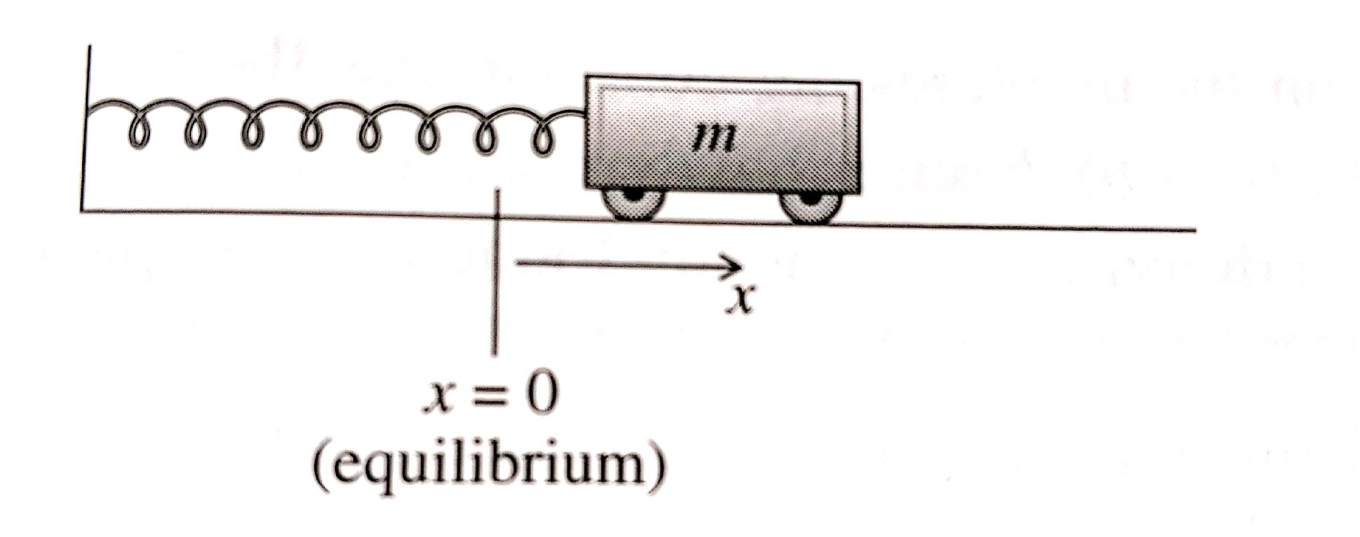

For initial conditions at time $ t= 0$: 
* $v_0 = 0$
* $x_0 = 1\;m$

$ma = -kx$ 
We can rewrite this as:
* $v = \frac{dx}{dt}$
* $\frac{dv}{dt} = -\frac{k}{m}x$

We will take $k = 1\; N/m, \; m = 1\; kg$

$x(t) = x_0 \cos(\omega t)$

In [2]:
k = 1 #N/m
m = 1 #kg

#initial conditions
x0 = np.array([1.0,0.0]) #[m, m/s]

t0 = 0 #s
tf = 15 #s
n = 101
t = np.linspace(t0,tf,n)

In [3]:
def shm(t,x,k,m):
    '''t is a numpy array
       y is a numpt array
       k is the spring constant
       m is the cart mass'''
    return np.array([x[1], -(k/m)*x[0]])

#another option would be to hard code k and m into the 
#equation function then we would not need args() when calling the function

# Runge-Kutta Method of Order 1 a.k.a. The Euler Method

The solution is approximated as

$$y_{n+1} = y_{n} + (t_{n+1}-t_n) f(t_n,y_n)$$

In [4]:
def rungekutta_1(f,t,x0, args=()):
    n = len(t)
    x = np.zeros((n,len(x0))) #n rows, len(y) columns i.e position and velocity
    x[0] = x0
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*f(t[i],x[i],*args)
    return x
#We will have to pass this function a list of args, here it would be b,c
# *args refres to the address of where we defined args, so it picks up all listed 
# quantities in args

In [5]:
sol_rk1 = rungekutta_1(shm,t,x0,args=(k,m)) #args order matters! they must match our equaton function order

<IPython.core.display.Javascript object>


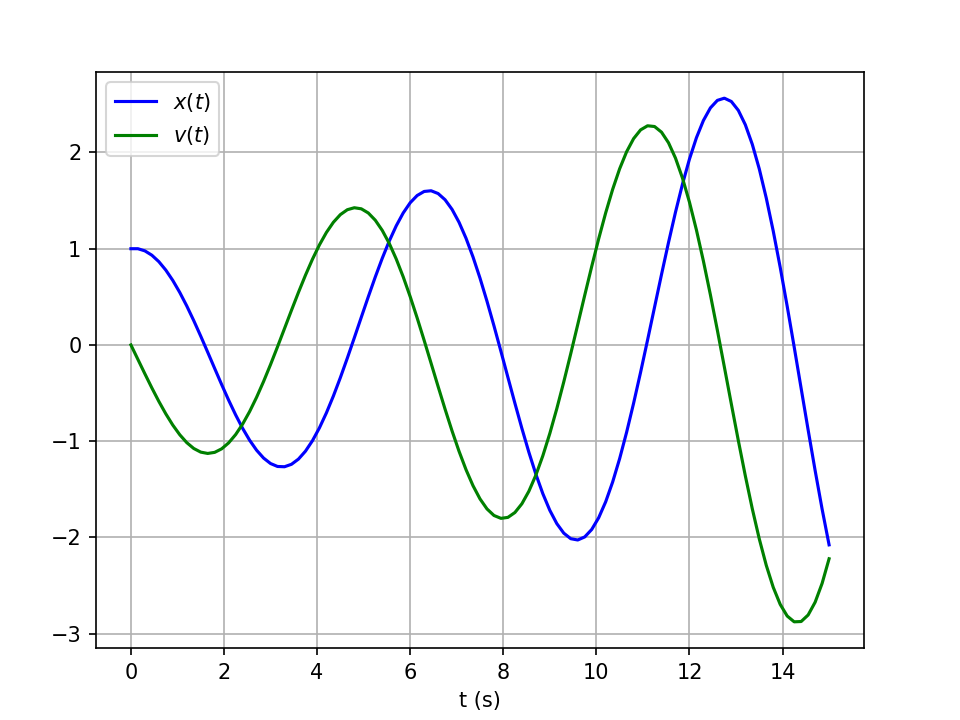

In [6]:
fig = plt.figure('Runge-Kutta 1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,sol_rk1[ :,0],'b', label=r'$x(t)$')
ax.plot(t,sol_rk1[ :,1], 'g', label=r'$v(t)$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

What if we reduce our step size?

In [7]:
t2 = np.linspace(t0,tf,1001)
sol_rk2 = rungekutta_1(shm,t2,x0,args=(k,m)) #args order matters! they must match our equaton function order
t3 = np.linspace(t0,tf,10001)
sol_rk3 = rungekutta_1(shm,t3,x0,args=(k,m)) #args order matters! they must match our equaton function order

<IPython.core.display.Javascript object>


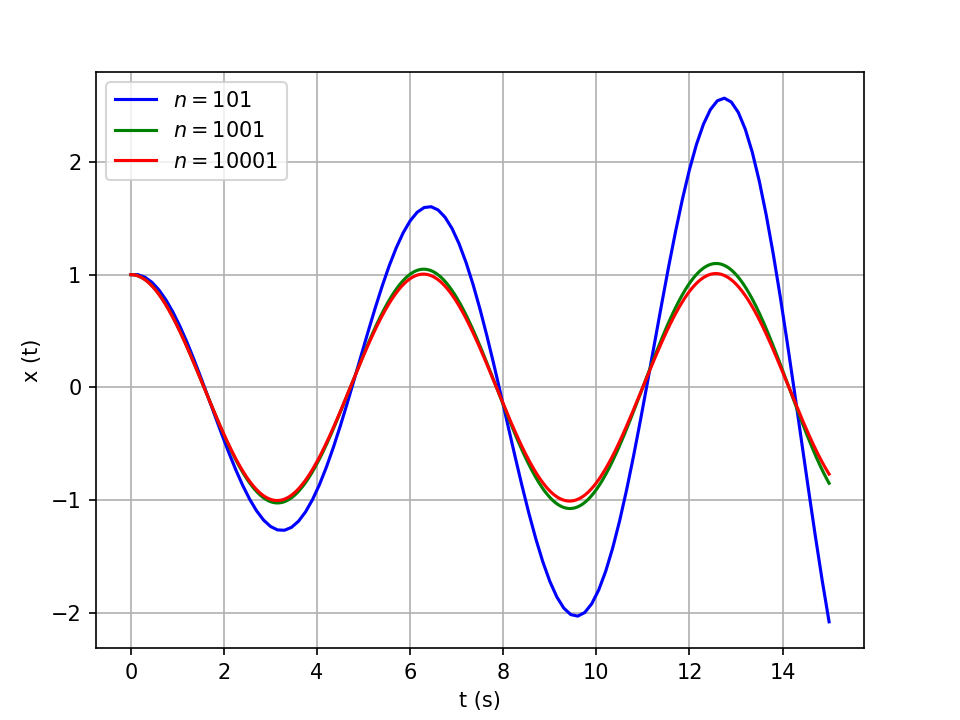

In [8]:
fig = plt.figure('Runge-Kutta Step Size')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t,sol_rk1[ :,0],'b', label=r'$n = 101$')
ax.plot(t2,sol_rk2[ :,0], 'g', label=r'$n = 1001$')
ax.plot(t3,sol_rk3[ :,0], 'r', label=r'$n = 10001$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (t)')
ax.grid();

# Runge-Kutta Method of Order 2

The solution is approximated by 

$$ y_{n+1} = y_{n} + \Delta t k_2$$

Where 

* $\Delta t = t_{n+1} - t_n$
* $k_1 = f(t_n,y_n) $
* $k_2 = f(t_n + \frac{\Delta t}{2},y_n +\frac{\Delta t}{2}k_1 )$

In [9]:
def rungekutta_2(f,t,x0, args=()):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        x[i+1] = x[i] + dt* f(t[i] + dt/2.0, x[i] + dt/2.0 * f(t[i],x[i], *args), *args)
    return x

In [10]:
sol_rk2_1 = rungekutta_2(shm,t,x0,args=(k,m)) #args order matters! they must match our equaton function order
t2 = np.linspace(t0,tf,1001)
sol_rk2_2 = rungekutta_2(shm,t2,x0,args=(k,m)) #args order matters! they must match our equaton function order
t2 = np.linspace(t0,tf,1001)
sol_rk2_3 = rungekutta_2(shm,t3,x0,args=(k,m)) #args order matters! they must match our equaton function order


<IPython.core.display.Javascript object>


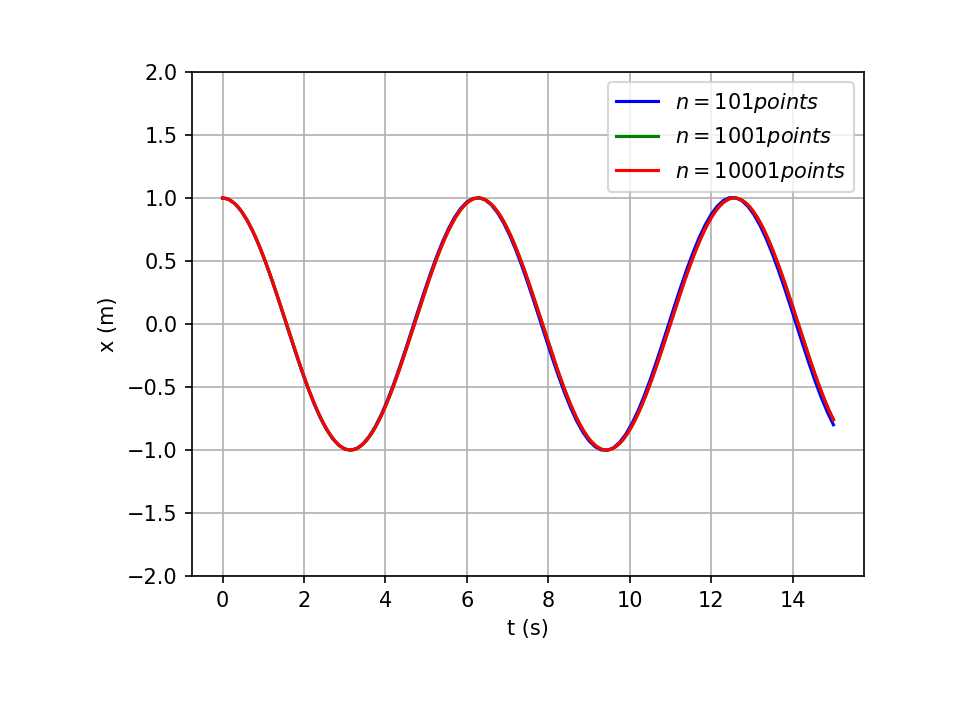

In [11]:
fig = plt.figure("n Comparison (RK2)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(t,sol_rk2_1[ :,0],'b', label=r'$n = 101 points$')
ax.plot(t2,sol_rk2_2[ :,0], 'g', label=r'$n = 1001 points$')
ax.plot(t3,sol_rk2_3[ :,0], color='r', label=r'$n = 10001 points$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (m)')
plt.ylim(-2,2)
plt.grid()

# Compare to Scipy

In [12]:
sol_RK45 = integrate.solve_ivp(shm,(t0,tf),x0,method='RK45', t_eval=t, args = (k,m))
sol_RK23 = integrate.solve_ivp(shm,(t0,tf),x0,method='RK23', t_eval=t, args = (k,m))

<IPython.core.display.Javascript object>


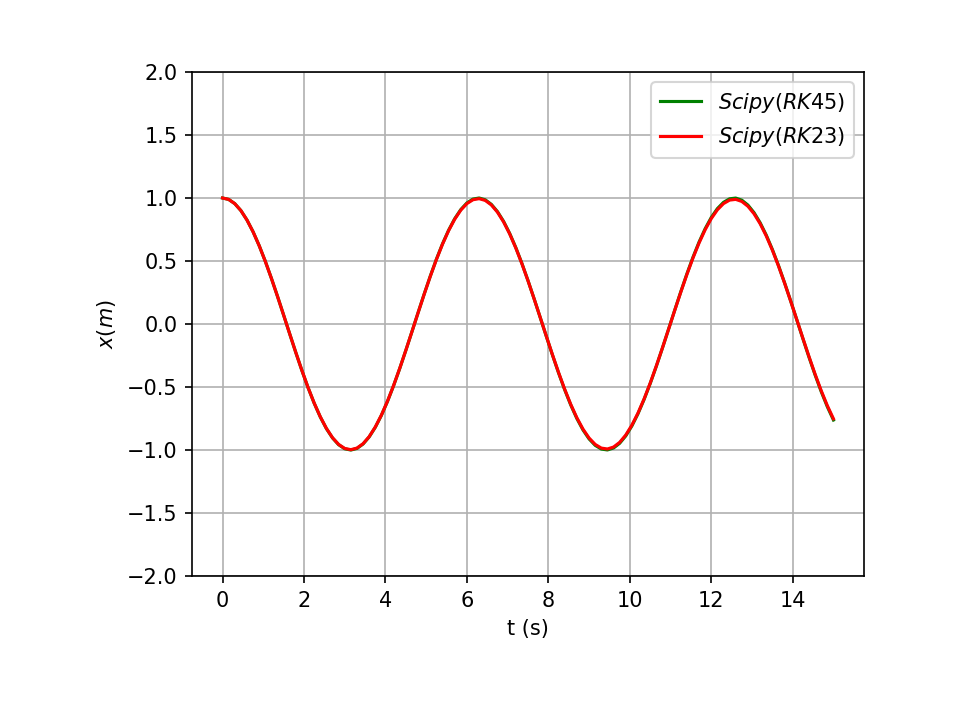

In [13]:
fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t,sol_RK45.y[0],'g', label=r'$Scipy (RK45)$')
ax.plot(t,sol_RK23.y[0],'r', label=r'$Scipy (RK23)$')


ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-2,2)
ax.grid();

# Adding Friction

$ma = -kx - cv$ 
We can rewrite this as:
* $v = \frac{dx}{dt}$
* $\frac{dv}{dt} = -\frac{k}{m}x - cv$


In [16]:
def shm_friction(t,x,k,m,c):
    '''t is a numpy array
       y is a numpt array
       k is the spring constant
       m is the cart mass
       c is a constant for air resistance'''
    return np.array([x[1], -(k/m)*x[0]] - c/m*x[1])

In [17]:
k = 1 #N/m
m = 1 #kg
c = 0.08 #kg/s

#initial conditions
x0 = np.array([1.0,0.0]) #[m, m/s]

t0 = 0 #s
tf = 60 #s
n = 101
t = np.linspace(t0,tf,n)

env = x0[0]*np.exp(-c*t/(2*m))

In [18]:
sol_RK45_friction = integrate.solve_ivp(shm_friction,(t0,tf),x0,method='RK45', t_eval=t, args = (k,m,c))
#sol_RK45_friction

<IPython.core.display.Javascript object>


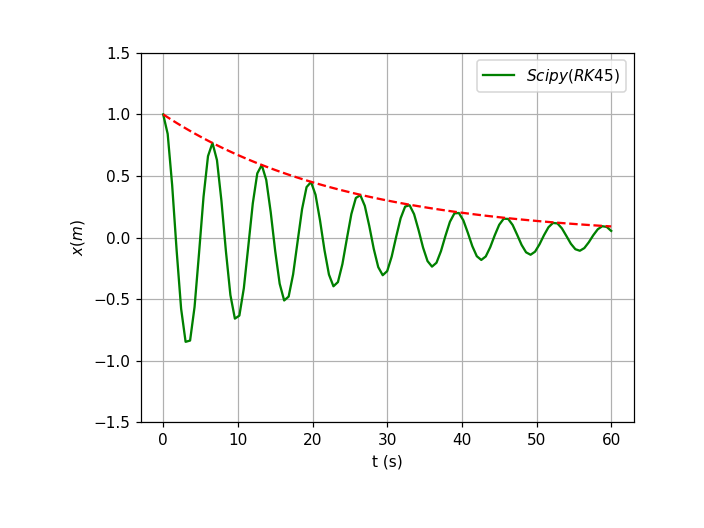

In [19]:
fig = plt.figure("SHM with Friction)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t,sol_RK45_friction.y[0],'g', label=r'$Scipy (RK45)$')
ax.plot(t,env,'r--', label='')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-1.5,1.5)
ax.grid();